# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1 : Loading Dataset

In [2]:
df = pd.read_csv('data/BA_reviews.csv')
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | On a recent flight from Cy...
1,1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,2,✅ Trip Verified | This was the first time I ...
3,3,✅ Trip Verified | Pretty good flight but sti...
4,4,"✅ Trip Verified | Check in was fine, but no pr..."
...,...,...
1195,1195,✅ Trip Verified | London to Miami. Worst long ...
1196,1196,✅ Trip Verified | I used avios point to upgrad...
1197,1197,"✅ Trip Verified | Boarding was fairly quick, t..."
1198,1198,✅ Trip Verified | Bangalore to London. Ground...


# Step 2: Removing Irrevelent text like Trip Verified

In [3]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,reviews
0,On a recent flight from Cyprus BA621 on 23/...
1,Flight BA 0560 arrived in Rome on 11 Decemb...
2,This was the first time I flew British Airw...
3,Pretty good flight but still some small thi...
4,"Check in was fine, but no priority/fast track..."
...,...
1195,London to Miami. Worst long haul business cla...
1196,I used avios point to upgrade from economy to...
1197,"Boarding was fairly quick, the well turned ou..."
1198,Bangalore to London. Ground experience not g...


# Step 3 : Intializing Stopwords and Lemmatizer

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Step 4 : Function to clean reviews

In [6]:
def clean_review(text):
    # Remove special characters, numbers, and URLs, and make text lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    
    # Tokenize and lemmatize while removing stopwords
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Step 5: Apply cleaning function to reviews


In [7]:
df['clean_reviews'] = df['reviews'].apply(clean_review)


In [8]:
df

,reviews,clean_reviews
0,On a recent flight from Cyprus BA621 on 23/...,recent flight cyprus ba second cabin door clos...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,flight ba arrived rome december passenger rece...
2,This was the first time I flew British Airw...,first time flew british airway huge disappoint...
3,Pretty good flight but still some small thi...,pretty good flight still small thing improved ...
4,"Check in was fine, but no priority/fast track...",check fine priorityfast track line security bo...
...,...,...
1195,London to Miami. Worst long haul business cla...,london miami worst long haul business class an...
1196,I used avios point to upgrade from economy to...,used avios point upgrade economy premium econo...
1197,"Boarding was fairly quick, the well turned ou...",boarding fairly quick well turned staff quickl...
1198,Bangalore to London. Ground experience not g...,bangalore london ground experience great lhr a...


# Step 6: Remove duplicates and handle missing values

In [9]:
df = df.drop_duplicates(subset=['clean_reviews'], keep='first')
df['clean_reviews'] = df['clean_reviews'].fillna('No review available')


In [10]:
df

,reviews,clean_reviews
0,On a recent flight from Cyprus BA621 on 23/...,recent flight cyprus ba second cabin door clos...
1,Flight BA 0560 arrived in Rome on 11 Decemb...,flight ba arrived rome december passenger rece...
2,This was the first time I flew British Airw...,first time flew british airway huge disappoint...
3,Pretty good flight but still some small thi...,pretty good flight still small thing improved ...
4,"Check in was fine, but no priority/fast track...",check fine priorityfast track line security bo...
...,...,...
1195,London to Miami. Worst long haul business cla...,london miami worst long haul business class an...
1196,I used avios point to upgrade from economy to...,used avios point upgrade economy premium econo...
1197,"Boarding was fairly quick, the well turned ou...",boarding fairly quick well turned staff quickl...
1198,Bangalore to London. Ground experience not g...,bangalore london ground experience great lhr a...


# step 7 : Sentiment Analysis

In [11]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'


In [12]:
df['sentiment'] = df['clean_reviews'].apply(get_sentiment)
df

,reviews,clean_reviews,sentiment
0,On a recent flight from Cyprus BA621 on 23/...,recent flight cyprus ba second cabin door clos...,positive
1,Flight BA 0560 arrived in Rome on 11 Decemb...,flight ba arrived rome december passenger rece...,negative
2,This was the first time I flew British Airw...,first time flew british airway huge disappoint...,negative
3,Pretty good flight but still some small thi...,pretty good flight still small thing improved ...,positive
4,"Check in was fine, but no priority/fast track...",check fine priorityfast track line security bo...,positive
...,...,...,...
1195,London to Miami. Worst long haul business cla...,london miami worst long haul business class an...,negative
1196,I used avios point to upgrade from economy to...,used avios point upgrade economy premium econo...,positive
1197,"Boarding was fairly quick, the well turned ou...",boarding fairly quick well turned staff quickl...,positive
1198,Bangalore to London. Ground experience not g...,bangalore london ground experience great lhr a...,positive


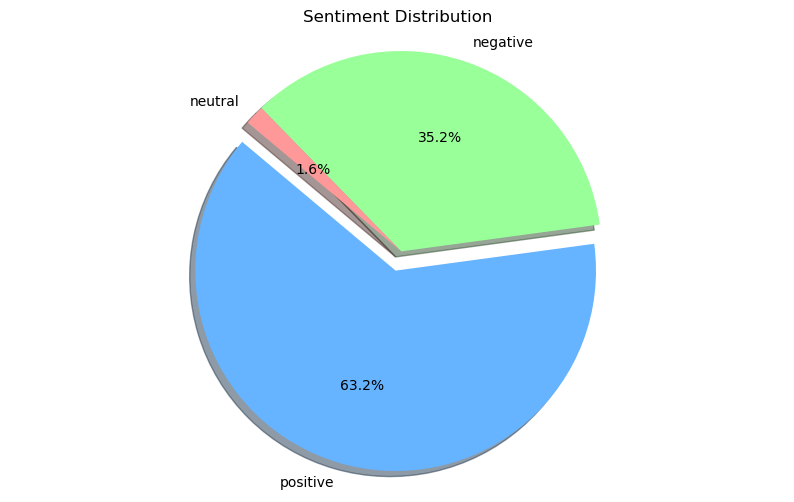

In [70]:
# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors =['#66b3ff', '#99ff99', '#ff9999']
explode = (0.1, 0, 0)  # Explode the first slice (Positive)

# Plot Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow ='True',startangle=140)
plt.title("Sentiment Distribution")
plt.axis('equal')

- Majority of the data points express positive sentiments

# step 8 : Generate WordCloud

In [32]:
text = ' '.join(df['clean_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

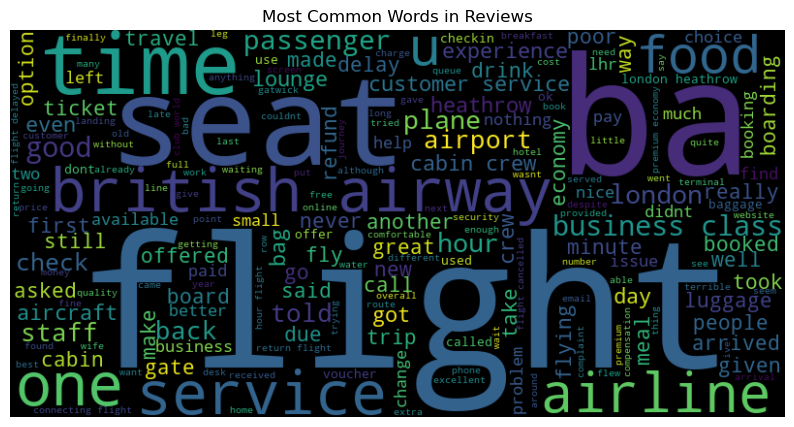

In [68]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.savefig('wordcloud.png')
plt.show()


# step 9 : Topic Modeling using LDA

In [16]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_reviews'])

In [17]:
#applying lda
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [18]:
# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])
    print("\n")


Topic #1:
['seat', 'flight', 'class', 'business', 'ba', 'food', 'economy', 'service', 'cabin', 'airline']


Topic #2:
['ticket', 'airway', 'crew', 'british', 'pram', 'mr', 'passenger', 'travel', 'pillow', 'airport']


Topic #3:
['ba', 'flight', 'service', 'cabin', 'crew', 'food', 'really', 'good', 'seat', 'passenger']


Topic #4:
['flight', 'crew', 'ba', 'good', 'service', 'time', 'seat', 'cabin', 'food', 'staff']


Topic #5:
['flight', 'ba', 'hour', 'customer', 'british', 'airway', 'service', 'day', 'london', 'time']




# step 10 : Summary Statistics

In [19]:
# Count reviews by sentiment
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
sentiment
positive    759
negative    422
neutral      19
Name: count, dtype: int64


In [20]:
# Example Insights: Top words or phrases by sentiment
positive_reviews = df[df['sentiment'] == 'positive']['clean_reviews']
negative_reviews = df[df['sentiment'] == 'negative']['clean_reviews']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

print("Most common words in positive reviews:")
print(pd.Series(positive_text.split()).value_counts().head(10))

print("Most common words in negative reviews:")
print(pd.Series(negative_text.split()).value_counts().head(10))

Most common words in positive reviews:
flight     1758
ba         1056
seat        693
service     578
time        540
good        473
crew        459
hour        389
london      388
food        386
Name: count, dtype: int64
Most common words in negative reviews:
flight      886
ba          496
seat        345
service     336
hour        326
airline     233
london      225
u           216
time        215
customer    212
Name: count, dtype: int64


In [21]:
# Get top 10 most common words for positive and negative reviews
positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

positive_word_freq = Counter(positive_words).most_common(10)
negative_word_freq = Counter(negative_words).most_common(10)

# Convert to DataFrames for easier plotting
positive_df = pd.DataFrame(positive_word_freq, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_word_freq, columns=['Word', 'Frequency'])

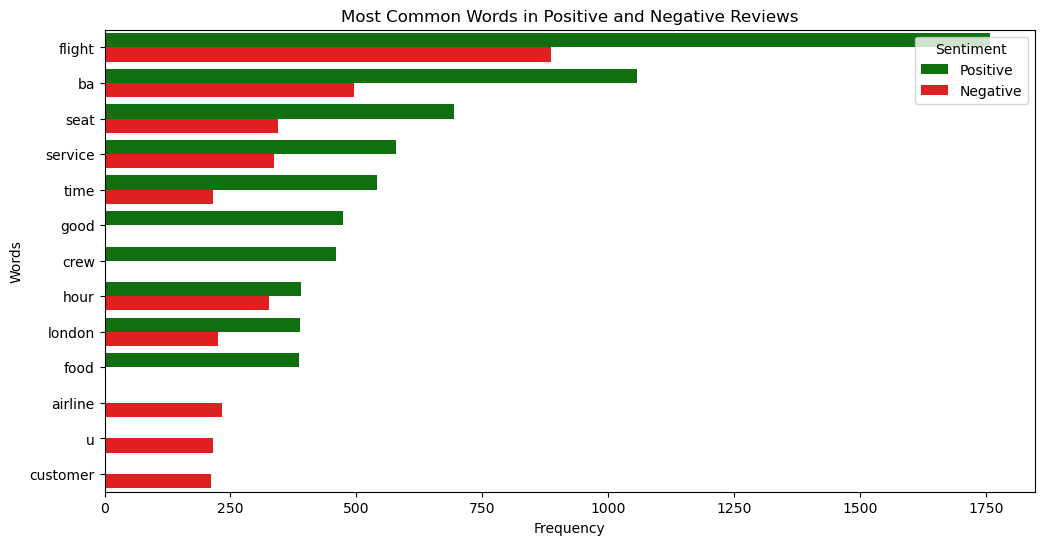

In [69]:
# Merge the positive and negative DataFrames for combined plotting
positive_df['Sentiment'] = 'Positive'
negative_df['Sentiment'] = 'Negative'

# Combine the DataFrames
combined_df = pd.concat([positive_df, negative_df])

# Plot combined graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', hue='Sentiment', data=combined_df, palette={'Positive': 'green', 'Negative': 'red'})
plt.title('Most Common Words in Positive and Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.savefig('positive_negative_words.png')
plt.show()

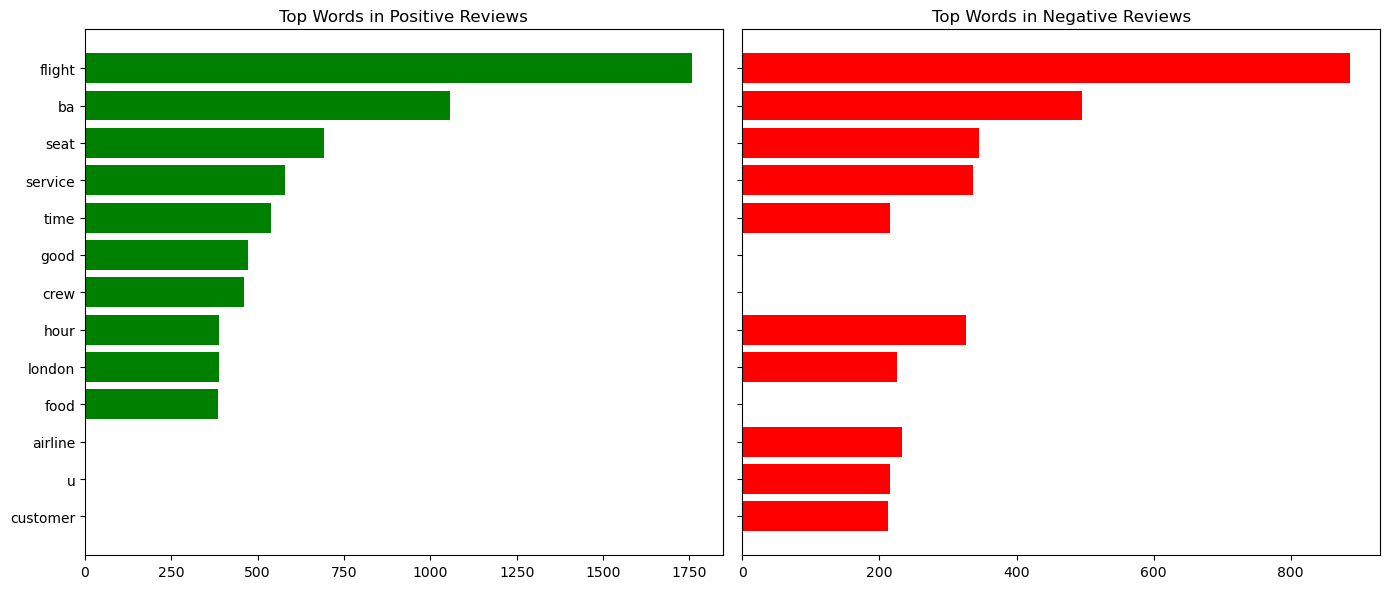

In [23]:
# Positive Reviews
#positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['clean_reviews'])
positive_word_counts = Counter(positive_text.split()).most_common(10)

# Negative Reviews
#negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['clean_reviews'])
negative_word_counts = Counter(negative_text.split()).most_common(10)

# Plot Bar Graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Positive Words
axes[0].barh([x[0] for x in positive_word_counts], [x[1] for x in positive_word_counts], color='green')
axes[0].set_title('Top Words in Positive Reviews')
axes[0].invert_yaxis()

# Negative Words
axes[1].barh([x[0] for x in negative_word_counts], [x[1] for x in negative_word_counts], color='red')
axes[1].set_title('Top Words in Negative Reviews')

plt.tight_layout()
plt.show()

In [51]:
df

,reviews,clean_reviews,sentiment
0,On a recent flight from Cyprus BA621 on 23/...,recent flight cyprus ba second cabin door clos...,positive
1,Flight BA 0560 arrived in Rome on 11 Decemb...,flight ba arrived rome december passenger rece...,negative
2,This was the first time I flew British Airw...,first time flew british airway huge disappoint...,negative
3,Pretty good flight but still some small thi...,pretty good flight still small thing improved ...,positive
4,"Check in was fine, but no priority/fast track...",check fine priorityfast track line security bo...,positive
...,...,...,...
1195,London to Miami. Worst long haul business cla...,london miami worst long haul business class an...,negative
1196,I used avios point to upgrade from economy to...,used avios point upgrade economy premium econo...,positive
1197,"Boarding was fairly quick, the well turned ou...",boarding fairly quick well turned staff quickl...,positive
1198,Bangalore to London. Ground experience not g...,bangalore london ground experience great lhr a...,positive
